# Extracting dataset from their respective zip files


In [4]:
import zipfile
training= zipfile.ZipFile('../input/higgs-boson/training.zip')
training.extractall()
test= zipfile.ZipFile('../input/higgs-boson/test.zip')
test.extractall()

# Importing Libraries

In [5]:
import numpy as np
import pandas as pd
pd.options.display.max_rows = 15
pd.options.display.max_columns = 300

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from plotly.subplots import make_subplots
from plotly import graph_objects as go

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from xgboost import XGBClassifier , XGBRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from xgboost import XGBClassifier , XGBRegressor

import shap

import warnings
warnings.filterwarnings("ignore")

# Importing Data

In [6]:
Data = pd.read_csv( './training.csv' )
Data_Event_ID = Data[['EventId']]
Data_Label = Data[['Label']]

Data_Test = pd.read_csv( './test.csv' )
Data_Test_Event_ID = Data_Test[['EventId']]

Data

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,0.879,1.414,-999.0,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,3.776,1.414,-999.0,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,2.354,-1.285,-999.0,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,1.056,-1.385,-999.0,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,349995,-999.000,71.989,36.548,5.042,-999.00,-999.000,-999.000,1.392,5.042,55.892,1.258,-1.414,-999.0,24.754,-0.414,-0.905,31.137,-0.950,0.380,46.520,2.859,144.665,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,4.505083,b
249996,349996,-999.000,58.179,68.083,22.439,-999.00,-999.000,-999.000,2.585,22.439,50.618,1.162,-1.345,-999.0,23.416,-1.609,2.776,27.202,0.308,1.042,46.737,-0.867,80.408,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,2.497259,b
249997,349997,105.457,60.526,75.839,39.757,-999.00,-999.000,-999.000,2.390,22.183,120.462,1.202,0.529,-999.0,35.636,-0.266,-3.132,42.834,0.381,0.851,23.419,-2.890,198.907,1,41.992,1.800,-0.166,-999.000,-999.00,-999.000,41.992,0.018636,s
249998,349998,94.951,19.362,68.812,13.504,-999.00,-999.000,-999.000,3.365,13.504,55.859,0.999,1.414,-999.0,27.944,-2.211,2.792,27.915,-0.874,-0.296,12.150,0.811,112.718,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,1.681611,b


In [7]:
Data_Test

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,350000,-999.000,79.589,23.916,3.036,-999.000,-999.000,-999.000,0.903,3.036,56.018,1.536,-1.404,-999.000,22.088,-0.540,-0.609,33.930,-0.504,-1.511,48.509,2.022,98.556,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000
1,350001,106.398,67.490,87.949,49.994,-999.000,-999.000,-999.000,2.048,2.679,132.865,1.777,-1.204,-999.000,30.716,-1.784,3.054,54.574,-0.169,1.795,21.093,-1.138,176.251,1,47.575,-0.553,-0.849,-999.000,-999.000,-999.000,47.575
2,350002,117.794,56.226,96.358,4.137,-999.000,-999.000,-999.000,2.755,4.137,97.600,1.096,-1.408,-999.000,46.564,-0.298,3.079,51.036,-0.548,0.336,19.461,-1.868,111.505,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
3,350003,135.861,30.604,97.288,9.104,-999.000,-999.000,-999.000,2.811,9.104,94.112,0.819,-1.382,-999.000,51.741,0.388,-1.408,42.371,-0.295,2.148,25.131,1.172,164.707,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
4,350004,74.159,82.772,58.731,89.646,1.347,536.663,-0.339,1.028,77.213,721.552,1.713,-0.913,0.004,45.087,-1.548,1.877,77.252,-1.913,2.838,22.200,-0.231,869.614,3,254.085,-1.013,-0.334,185.857,0.335,2.587,599.213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549995,899995,309.530,28.185,170.795,99.349,-999.000,-999.000,-999.000,3.061,2.367,212.640,0.708,1.346,-999.000,67.429,0.657,-2.560,47.761,-1.372,1.431,61.754,1.956,177.103,1,97.451,-1.759,-0.733,-999.000,-999.000,-999.000,97.451
549996,899996,105.653,5.096,77.256,33.040,-999.000,-999.000,-999.000,2.693,33.040,62.279,0.948,0.551,-999.000,31.964,0.162,-2.624,30.315,-1.404,-0.432,12.670,-0.172,130.730,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000
549997,899997,-999.000,69.470,51.766,1.189,-999.000,-999.000,-999.000,1.615,1.189,72.350,0.752,-1.398,-999.000,41.290,0.559,-2.156,31.060,0.578,2.512,49.505,0.336,71.646,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000
549998,899998,107.254,13.500,79.833,50.801,-999.000,-999.000,-999.000,2.026,7.993,135.762,1.087,-0.288,-999.000,44.403,-0.504,1.710,48.260,-0.096,-0.274,7.741,-0.988,243.371,1,43.099,-0.352,-2.594,-999.000,-999.000,-999.000,43.099


In [8]:
Data.drop(columns=['EventId'], inplace=True)
Data_Test.drop(columns=['EventId'], inplace=True)

## Replacing Invaid Values is NaN for futher analysis

In [9]:
Data.replace(to_replace=-999.000, value=np.nan, inplace=True)
Data_Test.replace(to_replace=-999.000, value=np.nan, inplace=True)

## Missing Values

In [10]:
def missing( df ):
    high_missing_values_features = []
    missing_values_features_less_5 = []
    missing_values_features_btw_5_and_40 = []
    missing_values_features = []
    for column in df.columns.values:
        print( "Feature:- ", column )
        percent_missing = df[column].isnull().sum()/df[column].shape[0]*100
        print('Percentage of Missing Values:- ', percent_missing )
    
        if percent_missing>=25:
            high_missing_values_features.append( column )
        elif percent_missing<=40:
            missing_values_features_less_5.append( column )
        elif percent_missing>5 & percent_missing<=40:
            missing_values_features_btw_5_and_25.append( column )
        print("--------------------------------------------------------------")
        print("\n")
    return missing_values_features_less_5, missing_values_features_btw_5_and_40,  high_missing_values_features

In [11]:
Data.isna().sum()

DER_mass_MMC                    38114
DER_mass_transverse_met_lep         0
DER_mass_vis                        0
DER_pt_h                            0
DER_deltaeta_jet_jet           177457
                                ...  
PRI_jet_subleading_eta         177457
PRI_jet_subleading_phi         177457
PRI_jet_all_pt                      0
Weight                              0
Label                               0
Length: 32, dtype: int64

In [12]:
missing_values_features_less_5, missing_values_features_btw_5_and_40,  high_missing_values_features = missing( Data )

Feature:-  DER_mass_MMC
Percentage of Missing Values:-  15.245600000000001
--------------------------------------------------------------


Feature:-  DER_mass_transverse_met_lep
Percentage of Missing Values:-  0.0
--------------------------------------------------------------


Feature:-  DER_mass_vis
Percentage of Missing Values:-  0.0
--------------------------------------------------------------


Feature:-  DER_pt_h
Percentage of Missing Values:-  0.0
--------------------------------------------------------------


Feature:-  DER_deltaeta_jet_jet
Percentage of Missing Values:-  70.9828
--------------------------------------------------------------


Feature:-  DER_mass_jet_jet
Percentage of Missing Values:-  70.9828
--------------------------------------------------------------


Feature:-  DER_prodeta_jet_jet
Percentage of Missing Values:-  70.9828
--------------------------------------------------------------


Feature:-  DER_deltar_tau_lep
Percentage of Missing Values:-  0.0
--

In [13]:
Data.drop(columns=high_missing_values_features,inplace=True)
Data_Test.replace(to_replace=-999.000, value=np.nan, inplace=True)

In [14]:
# Coorealation Matrix
px.imshow( Data.corr(),color_continuous_scale='RdBu_r', width=1200, height=1000 )

# Checking Target Feature

In [15]:
Data['Label'].unique()

array(['s', 'b'], dtype=object)

In [16]:
Data['Label'].value_counts()

b    164333
s     85667
Name: Label, dtype: int64

b    164333
s     85667
Name: Label, dtype: int64
-----------------------------


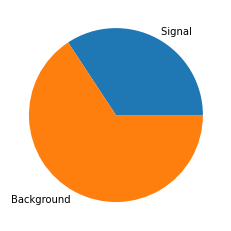

In [17]:
counts_signal = Data['Label'].value_counts()[1]
counts_background = Data['Label'].value_counts()[0]
plt.pie( [counts_signal, counts_background], labels=['Signal ','Background'] )
print( Data['Label'].value_counts() )
print('-----------------------------')

In [18]:
Data['Label'] = Data['Label'].replace(to_replace='s', value=1)
Data['Label'] = Data['Label'].replace(to_replace='b', value=0)

# Train Test Split
And Imputing High Missing Values 

In [19]:
X_train, X_test, y_train, y_test = train_test_split( Data.drop(['Label'], axis=1), Data[['Label']], test_size=0.25, random_state=10, stratify=Data[['Label']])

In [20]:
xgb_imputer = IterativeImputer( estimator=XGBRegressor(), max_iter=20, random_state=10, skip_complete=True ) 
xgb_imputer.fit( X_train )
X_train = pd.DataFrame(xgb_imputer.transform( X_train ), columns=X_train.columns.values)
X_test = pd.DataFrame(xgb_imputer.transform( X_test ), columns=X_train.columns.values)

# Data_Test = pd.DataFrame(xgb_imputer.transform( Data_Test ), columns=X_train.columns.values)

In [21]:
X_train.to_csv('preprocessed_X_train.csv')
X_test.to_csv('preprocessed_X_test.csv')
y_train.to_csv('preprocessed_X_train.csv')
y_test.to_csv('preprocessed_X_test.csv')

# Applying ANN Model

In [19]:
import tensorflow as tf
from keras import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.layers import InputLayer
from keras.callbacks import EarlyStopping
import keras_tuner as kt

In [20]:
# Plotting Loss vs epochs graph, Accuaracy vs epochs graph
def Plot_Loss_Accuracy( history, epochs ):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = np.linspace(1,epochs,epochs)
    epochs

    fig = go.Figure(data=go.Scatter( x=epochs, y=loss, name='loss' ))
    fig.add_trace( go.Scatter( x=epochs, y=val_loss, name='val_loss' ) )
    fig.update_layout( title="Loss", xaxis_title='epochs' )
    fig.show()

In [21]:
auc_roc_metric = tf.keras.metrics.AUC(curve='ROC')
precision_metric = tf.keras.metrics.Precision()

# Neural network
model = Sequential()
model.add(Dense(100, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy' , optimizer='adam', metrics=[precision_metric,auc_roc_metric])

2022-08-27 00:46:44.528190: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-27 00:46:44.529508: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-27 00:46:44.530183: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-27 00:46:44.530981: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [22]:
history = model.fit(X_train, y_train , validation_data=(X_test,y_test), epochs=10, batch_size=32)

2022-08-27 00:46:52.323788: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
5860/5860 [==============================] - 27s 4ms/step - loss: 0.3024 - precision: 0.8242 - auc: 0.9477 - val_loss: 0.1982 - val_precision: 0.8242 - val_auc: 0.9828
Epoch 2/10
5860/5860 [==============================] - 25s 4ms/step - loss: 0.1444 - precision: 0.8946 - auc: 0.9841 - val_loss: 0.0998 - val_precision: 0.9400 - val_auc: 0.9940
Epoch 3/10
5860/5860 [==============================] - 25s 4ms/step - loss: 0.1089 - precision: 0.9174 - auc: 0.9905 - val_loss: 0.0905 - val_precision: 0.9506 - val_auc: 0.9943
Epoch 4/10
5860/5860 [==============================] - 25s 4ms/step - loss: 0.0844 - precision: 0.9367 - auc: 0.9941 - val_loss: 0.0499 - val_precision: 0.9604 - val_auc: 0.9983
Epoch 5/10
5860/5860 [==============================] - 24s 4ms/step - loss: 0.0657 - precision: 0.9547 - auc: 0.9961 - val_loss: 0.1508 - val_precision: 0.8674 - val_auc: 0.9966
Epoch 6/10
5860/5860 [==============================] - 25s 4ms/step - loss: 0.0497 - precision: 0.9690 -

In [23]:
Plot_Loss_Accuracy( history, epochs=10 )

# Keras Tuner ANN Model

In [24]:
def hypertuning_model(hp):
    
    model = Sequential()
    model.add( InputLayer( input_shape=X_train.shape[1] ))
              
    number_of_layers = hp.Int('No_of_Layers',min_value=2,max_value=6)
    for num_layer in range(1, number_of_layers+1 ):
        model.add( Dense( hp.Int('layer'+str(num_layer), min_value=10, max_value=510, step=100), activation='relu'))
        # model.add( Dropout( hp.Choice('rate',values=[0.05,0.1,0.2,0.3] )))
        model.add( BatchNormalization() )
        
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', metrics=['accuracy', auc_roc_metric ],
                  optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-1,1e-2, 1e-3, 1e-4])))
    
    return model

In [25]:
hyper_tuner_model = kt.Hyperband( hypertuning_model, objective='val_loss',overwrite=True, max_epochs=10,seed=10 )

In [26]:
call_back_ES = EarlyStopping(monitor='val_loss',patience=3)
call_back_MCP = tf.keras.callbacks.ModelCheckpoint(filepath="./", monitor='val_loss', save_best_only=False, save_weights_only=False, mode='auto', save_freq='epoch')
hyper_tuner_model.search( X_train,y_train, validation_data=(X_test,y_test), epochs=10, callbacks=[call_back_ES,call_back_MCP] )

Trial 30 Complete [00h 07m 28s]
val_loss: 0.020989390090107918

Best val_loss So Far: 0.020989390090107918
Total elapsed time: 01h 17m 18s


In [27]:
best_hyperparameters = hyper_tuner_model.get_best_hyperparameters(num_trials=1)[0]
best_hyperparameters.values

{'No_of_Layers': 5,
 'layer1': 410,
 'layer2': 210,
 'learning_rate': 0.001,
 'layer3': 410,
 'layer4': 210,
 'layer5': 10,
 'layer6': 510,
 'tuner/epochs': 10,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 0,
 'tuner/round': 0}

In [28]:
n_best_models = hyper_tuner_model.get_best_models(num_models=1)[0]
n_best_models.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 410)               9020      
_________________________________________________________________
batch_normalization (BatchNo (None, 410)               1640      
_________________________________________________________________
dense_1 (Dense)              (None, 210)               86310     
_________________________________________________________________
batch_normalization_1 (Batch (None, 210)               840       
_________________________________________________________________
dense_2 (Dense)              (None, 410)               86510     
_________________________________________________________________
batch_normalization_2 (Batch (None, 410)               1640      
_________________________________________________________________
dense_3 (Dense)              (None, 210)               8

In [29]:
final_model = hyper_tuner_model.hypermodel.build( best_hyperparameters )
history = final_model.fit(X_train,y_train, validation_data=(X_test,y_test),epochs=10 )

Epoch 1/10
5860/5860 [==============================] - 42s 7ms/step - loss: 0.1958 - accuracy: 0.9180 - auc: 0.9777 - val_loss: 0.1405 - val_accuracy: 0.9458 - val_auc: 0.9870
Epoch 2/10
5860/5860 [==============================] - 41s 7ms/step - loss: 0.1160 - accuracy: 0.9541 - auc: 0.9900 - val_loss: 0.4531 - val_accuracy: 0.8995 - val_auc: 0.9708
Epoch 3/10
5860/5860 [==============================] - 41s 7ms/step - loss: 0.1004 - accuracy: 0.9602 - auc: 0.9923 - val_loss: 0.0798 - val_accuracy: 0.9756 - val_auc: 0.9966
Epoch 4/10
5860/5860 [==============================] - 40s 7ms/step - loss: 0.0786 - accuracy: 0.9695 - auc: 0.9952 - val_loss: 0.2249 - val_accuracy: 0.8798 - val_auc: 0.9983
Epoch 5/10
5860/5860 [==============================] - 40s 7ms/step - loss: 0.0508 - accuracy: 0.9806 - auc: 0.9979 - val_loss: 0.0436 - val_accuracy: 0.9837 - val_auc: 0.9989
Epoch 6/10
5860/5860 [==============================] - 41s 7ms/step - loss: 0.0313 - accuracy: 0.9884 - auc: 0.999

In [30]:
Plot_Loss_Accuracy( history, epochs=10 )

# Neural Network using Pytorch

In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

## Basic Parameters

In [23]:
EPOCHS = 20
BATCH_SIZE = 64
LEARNING_RATE = 0.001

## Dataset for PyTorch

In [24]:
class Train(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)


## test data    
class Test(Dataset):
    
    def __init__(self, X_data):
        self.X_data = X_data
        
    def __getitem__(self, index):
        return self.X_data[index]
        
    def __len__ (self):
        return len(self.X_data)
    
########################

train_data = Train(torch.FloatTensor(X_train.values), torch.FloatTensor(y_train.values))
test_data = Test(torch.FloatTensor(X_test.values))

########################

train_loader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=1)

## Neural Network

In [29]:
class NN_Model(nn.Module):
    def __init__(self):
        super(NN_Model, self).__init__()
        # Number of input features is 129.
        self.layer_1 = nn.Linear(X_train.shape[1], 200) 
        self.layer_2 = nn.Linear(200, 100)
        self.layer_out = nn.Linear(100, 1) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)
       
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.relu(self.layer_2(x))
        x = self.dropout(x)
        x = self.layer_out(x)
        
        return x
    
##############

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

##############

model = NN_Model()
model.to(device)
print(model)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

##############

cuda:0
NN_Model(
  (layer_1): Linear(in_features=21, out_features=200, bias=True)
  (layer_2): Linear(in_features=200, out_features=100, bias=True)
  (layer_out): Linear(in_features=100, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
)


## Metric

In [30]:
def binary_acc(y_pred, y_test):
    y_pred_tag = torch.round(torch.sigmoid(y_pred))
    
    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = torch.round(acc * 100)
    
    return acc

## Train Neural Network

In [31]:
losss = []
epoch_losss = []
epoch_accc = []
accs = []
model.train()
for e in range(1, EPOCHS+1):
    epoch_loss = 0
    epoch_acc = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        
        y_pred = model(X_batch)
        
        loss = criterion(y_pred, y_batch)
        acc = binary_acc(y_pred, y_batch)
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        losss.append(epoch_loss)
        accs.append(epoch_acc)
    epoch_losss.append(epoch_loss/len(train_loader))
    epoch_accc.append(epoch_acc/len(train_loader))

    print(f'Epoch {e+0:03}: | Loss: {epoch_loss/len(train_loader):.5f} | Acc: {epoch_acc/len(train_loader):.3f}')

Epoch 001: | Loss: 0.26737 | Acc: 88.054
Epoch 002: | Loss: 0.14323 | Acc: 94.010
Epoch 003: | Loss: 0.11110 | Acc: 95.544
Epoch 004: | Loss: 0.09529 | Acc: 96.239
Epoch 005: | Loss: 0.07354 | Acc: 97.167
Epoch 006: | Loss: 0.05541 | Acc: 97.932
Epoch 007: | Loss: 0.04618 | Acc: 98.378
Epoch 008: | Loss: 0.03701 | Acc: 98.616
Epoch 009: | Loss: 0.03199 | Acc: 98.805
Epoch 010: | Loss: 0.03454 | Acc: 98.729
Epoch 011: | Loss: 0.02723 | Acc: 99.019
Epoch 012: | Loss: 0.02469 | Acc: 99.149
Epoch 013: | Loss: 0.02372 | Acc: 99.121
Epoch 014: | Loss: 0.01997 | Acc: 99.270
Epoch 015: | Loss: 0.02089 | Acc: 99.261
Epoch 016: | Loss: 0.02049 | Acc: 99.305
Epoch 017: | Loss: 0.01472 | Acc: 99.459
Epoch 018: | Loss: 0.01998 | Acc: 99.315
Epoch 019: | Loss: 0.01700 | Acc: 99.404
Epoch 020: | Loss: 0.01664 | Acc: 99.422


## Plot Loss and Accuracy

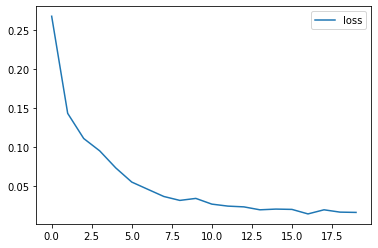

In [32]:
plt.plot(epoch_losss, label='loss')
plt.legend()
plt.show()

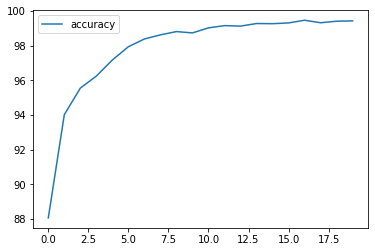

In [33]:
plt.plot(epoch_accc, label='accuracy')
plt.legend()
plt.show()

In [34]:
y_pred_list = []
model.eval()
with torch.no_grad():
    for X_batch in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        y_test_pred = torch.sigmoid(y_test_pred)
        y_pred_list.append(y_test_pred.cpu().numpy())

y_pred_list = [a.squeeze().tolist() for a in y_pred_list]